PRIMEIRA APLICAÇÃO DE APRENDIZADO DE MÁQUINA

*Utilização do Dataset de detecção de fumaça em estabelecimentos para uma aplicação de algoritmo de Machine Learning*
**ETAPA 1:**

- Sem etapa bruta de pré-processamento;
- Aplicação de Árvore de Decisão;
- Avaliação de desempenho; 

In [67]:
# Importando bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

# Importar a biblioteca para mostrar a matriz de confusão da árvore
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Importando bibliotecas para calcular métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [51]:
# Ler dados do DataSet
csv_dir_treinamento = "/content/sample_data/smoke_detection_iot.csv"
data = pd.read_csv(csv_dir_treinamento, delimiter=",")

In [52]:
data.head()

,Index,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [ ]:
# Remover coluna de Indice e pegar coluna de classificação
data.drop(["Index"], axis=1, inplace=True)
x = data.drop('Fire Alarm', axis=1)
y = data['Fire Alarm']

In [54]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Fire Alarm, dtype: int64

In [55]:
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [58]:
# Separar dados de treinamento e de testes
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [ ]:
# Criando a árvore e definindo o criterio de criação usando entropia
tree_classifier = DecisionTreeClassifier(criterion="entropy")
tree_classifier.fit(x_train, y_train)

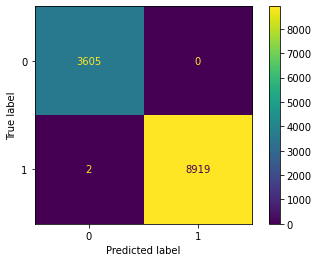

In [66]:
# Gerar e mostrar matriz de confusão
conf_matrix = confusion_matrix(y_test, tree_classifier.predict(x_test))
cmd = ConfusionMatrixDisplay(conf_matrix)
cmd.plot(values_format="d")
plt.show()

In [68]:
# Mostrar métricas
print("Accuracy score = ", accuracy_score(y_test, tree_classifier.predict(x_test)))
print(classification_report(y_test, tree_classifier.predict(x_test)))

Accuracy score =  0.9998403321092129
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3605
           1       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

